In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
data = pd.read_csv('data.csv')

In [61]:
new_data = data.drop(['longitude', 'latitude'], axis = 1, inplace = True)

In [62]:
x = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(x, inplace = True)

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_feature = encoder.fit_transform(data[['ocean_proximity']])

encoded_df = pd.DataFrame(encoded_feature, columns = encoder.get_feature_names_out(['ocean_proximity']))
data_encoded = pd.concat([data.drop('ocean_proximity', axis=1), encoded_df], axis=1)

c:\Users\charmingBlackhole\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
data_encoded

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [65]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   total_rooms                 20640 non-null  float64
 2   total_bedrooms              20640 non-null  float64
 3   population                  20640 non-null  float64
 4   households                  20640 non-null  float64
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  float64
 7   ocean_proximity_<1H OCEAN   20640 non-null  float64
 8   ocean_proximity_INLAND      20640 non-null  float64
 9   ocean_proximity_ISLAND      20640 non-null  float64
 10  ocean_proximity_NEAR BAY    20640 non-null  float64
 11  ocean_proximity_NEAR OCEAN  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [66]:
# data_encoded['average_room'] = data_encoded['total_rooms'] + data_encoded['total_bedrooms']

data_encoded['beroom_ratio'] = data_encoded['total_bedrooms'] / data_encoded['total_rooms']
data_encoded['household_rooms'] = data_encoded['total_rooms'] + data_encoded['households']

In [67]:
corr_matrix = data_encoded.corr()
print(corr_matrix['median_house_value'])

housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049457
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
beroom_ratio                 -0.233303
household_rooms               0.125269
Name: median_house_value, dtype: float64


<Axes: >

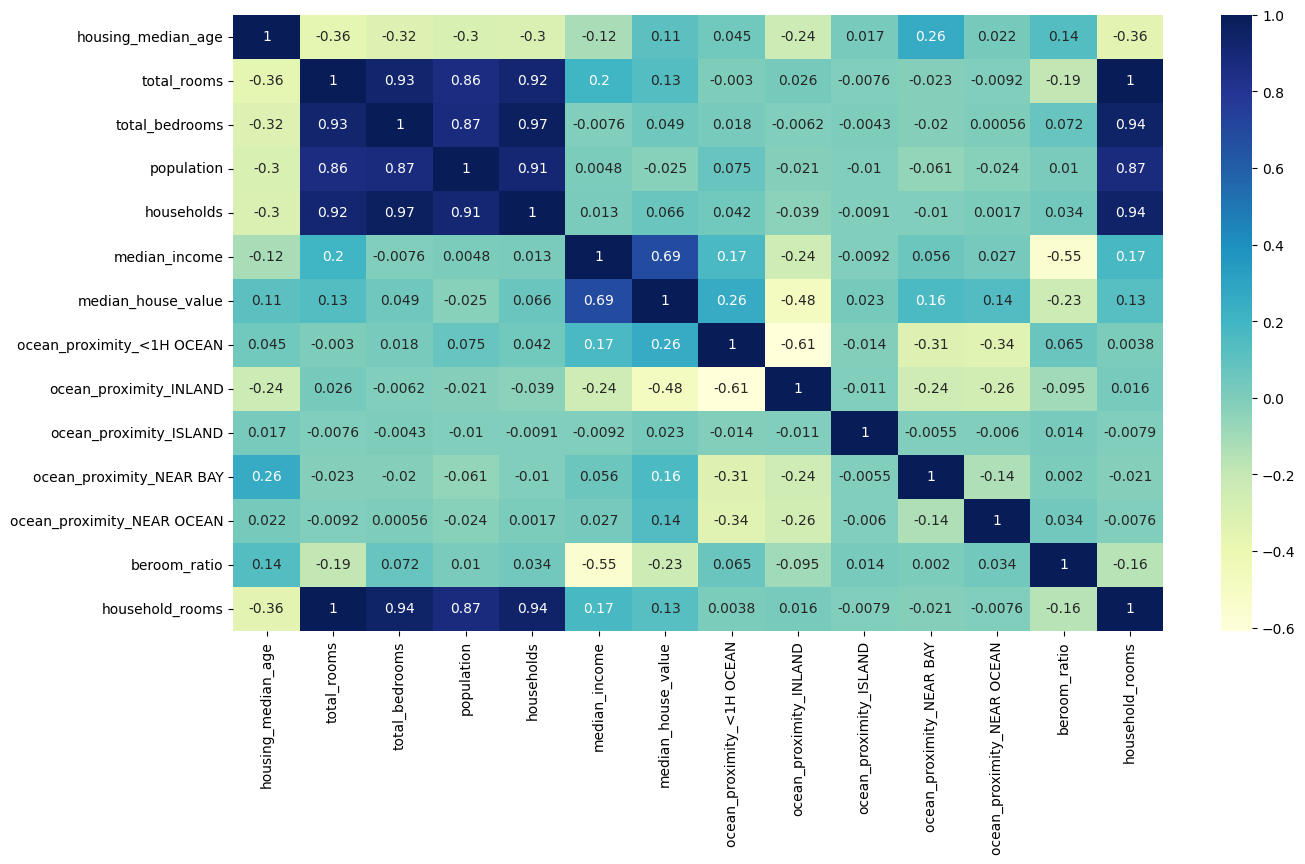

In [68]:
plt.figure(figsize=(15, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='YlGnBu')

In [69]:
from sklearn.model_selection import train_test_split
import pandas as pd

x = data_encoded.drop(['median_house_value'], axis=1)
y = data_encoded['median_house_value']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

train_data = pd.concat([x_train, y_train], axis=1)


In [70]:
from sklearn.linear_model import LinearRegression


x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [71]:
test_data = x_test.join(y_test)


In [72]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [73]:
reg.score(x_test, y_test)

0.6209211782140996